In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


In [2]:
from automatic_car.frame_dataset import FramesDataset 
from torch.utils.data import DataLoader

train_dataset = FramesDataset("train")
train_dataloader = DataLoader(train_dataset,batch_size= 32,shuffle = True)
test_dataset = FramesDataset("test")
test_dataloader = DataLoader(train_dataset,batch_size= 32,shuffle = True)


In [3]:
class Model0(nn.Module):
    def __init__(self, num_channels, num_classes) -> None:
        super().__init__()
        hidden_units = 12
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(
                in_channels=num_channels,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=3,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=3),
        )
        self.linear_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=1200, out_features=num_classes),
        )

    def forward(self, x: torch.Tensor):
        x = self.cnn_layer(x)
        return self.linear_layer(x)



In [4]:
from automatic_car.utils import train
from automatic_car.utils import test
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
epochs = range(30)
num_channels = train_dataset.get_num_channels()
num_classes = train_dataset.get_num_classes()
model = Model0(num_channels=num_channels,num_classes=num_classes)
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.parameters(),lr = 0.001)
train_loss = [train(model=model,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,device=DEVICE) for _ in epochs]
test_loss = [test(model=model,data_loader=train_dataloader,loss_fn=loss_fn,device=DEVICE) for _ in epochs]




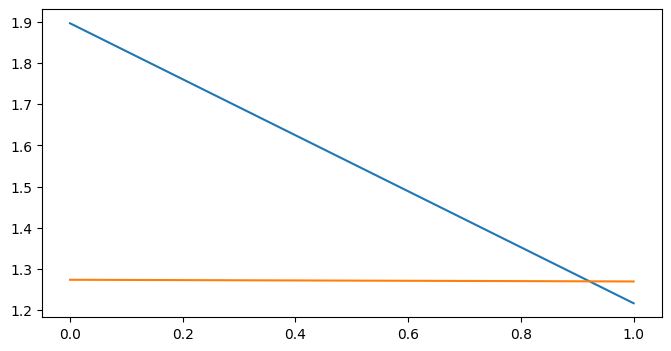

In [5]:
# # Create subplots
plt.figure(figsize=(8,4))
# Plot array1 on the first subplot
plt.plot(train_loss,label='Train loss')
plt.plot(test_loss,label='Test loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.show()
plt.legend()
# Show the plot
plt.show()
